## ASSIGNMENT 8

## 1.Problem Statement 

- In this assignment students have to transform iris data into 3 dimensions  and plot a 3d chart with transformed dimensions and colour each data  point with specific class. 

- Hint: 
  - import numpy as np 
  - import matplotlib.pyplot as plt 
  - from mpl_toolkits.mplot3d import Axes3D 
  - from sklearn import decomposition 
  - from sklearn import datasets



In [20]:
# importing dataset and libraries 
import pandas as pd
import numpy as np
import seaborn as sns
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [3]:
df.head(10)

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [15]:
df.tail(10)

,sepal length,sepal width,petal length,petal width,target
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length    150 non-null float64
sepal width     150 non-null float64
petal length    150 non-null float64
petal width     150 non-null float64
target          150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
df.shape

(150, 5)

### Univariate Analysis## 

In [14]:
df_setosa=df.loc[df['target']=='Iris-setosa']

In [16]:
df_virginica=df.loc[df['target']=='Iris-virginica']
df_versicolor=df.loc[df['target']=='Iris-versicolor']

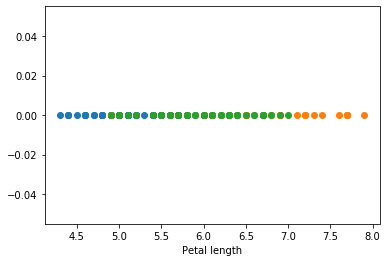

In [19]:
plt.plot(df_setosa['sepal length'],np.zeros_like(df_setosa['sepal length']),'o')
plt.plot(df_virginica['sepal length'],np.zeros_like(df_virginica['sepal length']),'o')
plt.plot(df_versicolor['sepal length'],np.zeros_like(df_versicolor['sepal length']),'o')
plt.xlabel('Petal length')
plt.show()

## Bivariate Analysis

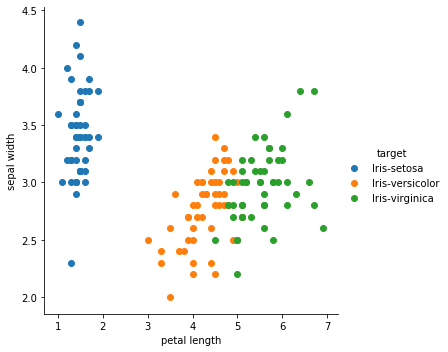

In [22]:
sns.FacetGrid(df,hue="target",size=5).map(plt.scatter,"petal length","sepal width").add_legend();
plt.show()

## Multivariate Analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


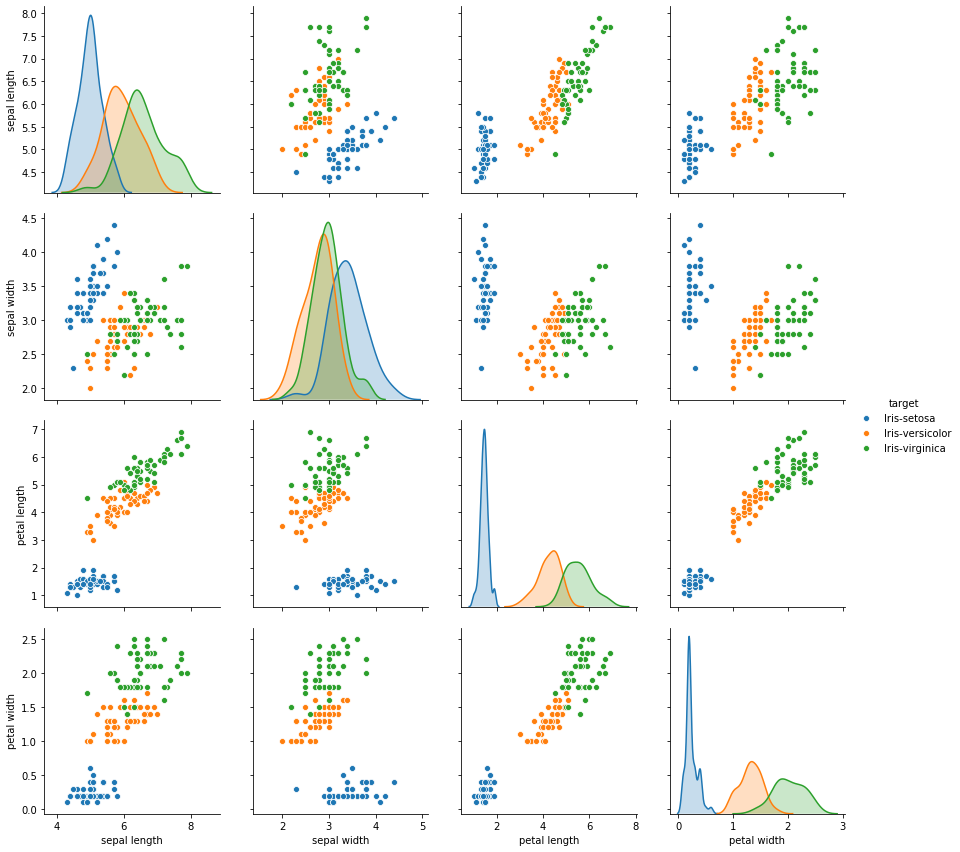

In [23]:
sns.pairplot(df,hue="target",size=3)

In [5]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df.loc[:, features].values
y = df.loc[:,['target']].values

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])

In [7]:

finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

In [8]:
x_vals = finalDf['principal component 1']
y_vals = finalDf['principal component 2']
z_vals = finalDf['principal component 3']

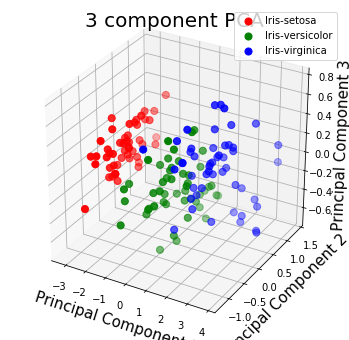

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
# Create 3d figure
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()